## Convolutional Neural network - Mạng neuro tích chập

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [76]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [77]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [78]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

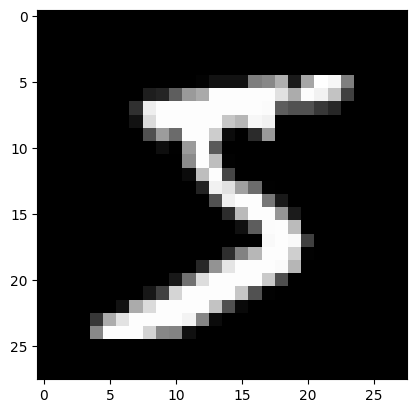

In [79]:
plt.imshow(X_train[0], cmap='gray')

In [80]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
# So -1 la de cho python tu tnh so con lai cho phu hop

In [81]:
X_train.shape

(60000, 784)

In [82]:
# ep kieu
X_train= X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescale
X_train /= 255.0
X_test /= 255.0


In [83]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [84]:
y_train[0]

5

In [85]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Sử dụng mạng DNN

In [86]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [87]:
# reset
K.clear_session()
# Tao model
model = Sequential()
model.add(Dense(512, input_dim = 28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


### Training

In [88]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)


Epoch 1/10
329/329 [==============================] - 4s 10ms/step - loss: 0.3255 - accuracy: 0.9004 - val_loss: 0.2034 - val_accuracy: 0.9408
Epoch 2/10
329/329 [==============================] - 3s 10ms/step - loss: 0.1111 - accuracy: 0.9665 - val_loss: 0.1613 - val_accuracy: 0.9543
Epoch 3/10
329/329 [==============================] - 5s 16ms/step - loss: 0.0725 - accuracy: 0.9776 - val_loss: 0.1408 - val_accuracy: 0.9603
Epoch 4/10
329/329 [==============================] - 5s 16ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.1130 - val_accuracy: 0.9711
Epoch 5/10
329/329 [==============================] - 5s 15ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0953 - val_accuracy: 0.9754
Epoch 6/10
329/329 [==============================] - 5s 15ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.1190 - val_accuracy: 0.9747
Epoch 7/10
329/329 [==============================] - 5s 15ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.1227 - val_accuracy: 0.9748

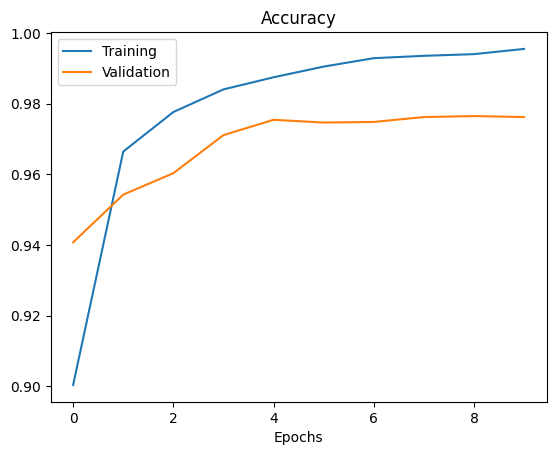

In [89]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');

In [90]:
test_accuracy = model.evaluate(X_test, y_test_cat)
test_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.9785


[0.11217577010393143, 0.9785000085830688]

### Sử dụng convolutional neural network

In [92]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1, 28, 28, 1)
# Số -1 là để cho python tự tính số còn lại cho phù hợp 

In [93]:
X_train.shape

(60000, 28, 28, 1)

In [94]:
from keras.layers import Flatten, Activation, MaxPool2D, Conv2D

# Tạo model CNN

In [96]:
# Reset
K.clear_session()
# tạo model
model = Sequential()
# Them cac layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))

# Thiet lap thong so
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [97]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=5,verbose=1, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 14s 42ms/step - loss: 0.2419 - accuracy: 0.9254 - val_loss: 0.0968 - val_accuracy: 0.9706
Epoch 2/5
329/329 [==============================] - 19s 57ms/step - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.0494 - val_accuracy: 0.9853
Epoch 3/5
329/329 [==============================] - 21s 63ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0433 - val_accuracy: 0.9868
Epoch 4/5
329/329 [==============================] - 22s 67ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0531 - val_accuracy: 0.9849
Epoch 5/5
329/329 [==============================] - 23s 71ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0604 - val_accuracy: 0.9845


### Evaluate

In [99]:
test_accuracy = model.evaluate(X_test, y_test_cat)
test_accuracy

313/313 [==============================] - 1s 5ms/step - loss: 0.0437 - accuracy: 0.9856


[0.04369693621993065, 0.9855999946594238]